### Using Random Forest to predict rainfall

### What is our Objective ?
* To reliably predict next day's rainfall using possible derminants.

### Getting to know our WeatherAus dataset! 

WeatherAus dataset contains about 10 years of daily weather observations from many locations across Australia it has the following features:

* Date - The date of observation.
* Location - Location of the weather station.
* MinTemp - Minimum temperature of the observed day in degree celsius.
* MaxTemp - Maximum temperature of the observed day in degree celsius.
* Rainfall - The amount of rainfall recorded for the day in mm.
* Evaporation - Class A pan evaporation (mm) in the 24 hours to 9am.
* Sunshine - The number of hours of bright sunshine in the day.
* WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight.
* WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight.
* WindDir9am - Direction of the wind at 9am.
* WindDir3pm - Direction of the wind at 3pm.
* WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am.
* WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm.
* Humidity9am - Humidity (percent) at 9am.
* Humidity3pm - Humidity (percent) at 3pm.
* Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am.
* Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm.
* Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many.
* Cloud3pm - Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many.
* Temp9am - Temperature (degrees C) at 9am.
* Temp3pm - Temperature (degrees C) at 3pm.
* RainToday -  if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.
* RainTomorrow - The amount of next day rain in mm.

### Approach
* In this example, we will be balancing an imbalanced data set using random oversampling, undersampling and SMOTE.
* Then we'll label encode categorical features.
* Use various imputation methods to handle missing values in the dataset.
* Split the preprocessed dataset and train on it using RandomForest API from mlpack.
* Finally we'll use various metrics such as Accuracy, F1-Score, ROC AUC to judge the performance of our model.

#### NOTE: This example has 4 parts implementing the above approach using raw imbalanced data, undersampled, oversampled & using SMOTE. 

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlpack
from sklearn.metrics import *

In [3]:
%matplotlib inline
sns.set(color_codes=True)

### Load the data

In [4]:
# Load Rain in Australia (weatherAUS) dataset.
weatherData = pd.read_csv("http://datasets.mlpack.org/weatherAUS.csv", parse_dates=["Date"])

### Explore the data

In [5]:
# Examine first 5 samples from the dataset.
weatherData.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Examine the shape of the dataframe.
print(f"# of rows: {weatherData.shape[0]}")
print(f"# of cols: {weatherData.shape[1]}")

# of rows: 145460
# of cols: 23


In [7]:
# Concise summary if all the features in the dataframe.
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### Exploring Categorical and Numeric features

In [8]:
print("CATEGORIAL FEATURES:")
for col in weatherData.columns:
    if weatherData[col].dtype == "object":
        print(col)

CATEGORIAL FEATURES:
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [9]:
print("NUMERIC FEATURES:")
for col in weatherData.columns:
    if weatherData[col].dtype == "float":
        print(col)

NUMERIC FEATURES:
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


### Part 1 - Modelling using Imbalanced Dataset

### Visualize the Missing Values

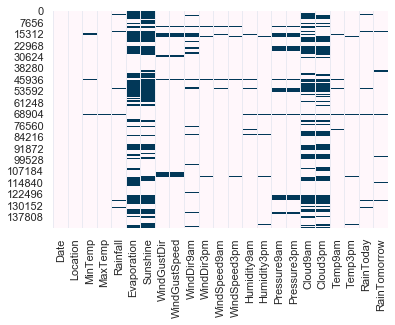

In [10]:
# Plot a heatmap to visualize missing values.
sns.heatmap(weatherData.isnull(), cbar=False, cmap="PuBu")
plt.show()

The above visualization shows that high number of values are missing in: Sunshine, Evaporation, Cloud9am and Cloud3pm

In [11]:
## Check the percentage of missing values in each feature before imputation.
(weatherData.isnull().sum() / len(weatherData)) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

We observe that atmost some features have 50% missing values. So instead of discarding them, we will impute them with proper imputation method.

In [12]:
def Imputer(data: pd.DataFrame, kind: str="mean") -> pd.DataFrame:
    """
    Returns the imputed dataset based on the imputation policy.
    
        Parameters:
            data (DataFrame): Pandas dataframe on which imputation must be done.
            kind (str): imputation policy.
        
        Returns:
            df (DataFrame): Pandas dataframe containing the imputed values.
    """
    df = data.copy()
    for feature in data.columns:
        if df[feature].dtype == "float":
            if kind == "mean":
                df[feature] = df[feature].fillna(df[feature].mean())
            elif kind == "median":
                df[feature] = df[feature].fillna(df[feature].median())
            elif kind == "mode":
                df[feature] = df[feature].fillna(df[feature].mode()[0])
        elif df[feature].dtype == "object":
            df[feature] = df[feature].fillna(df[feature].mode()[0])
    return df

In [13]:
# Impute the data using mean imputation strategy.
weatherImp = Imputer(weatherData)

In [14]:
## Check the percentage of missing values in each feature post imputation.
(weatherImp.isnull().sum() / len(weatherImp)) * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

### Visualize data distribution 

Next, we will check whether the dataset is imbalanced or balanced. If the dataset is imbalanced, we need to undersample majority or oversample minority to balance it.

In [15]:
weatherData.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

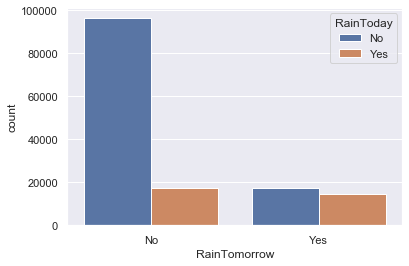

In [16]:
# Visualize the distibution of target classes.
sns.countplot(x="RainTomorrow", hue="RainToday", data=weatherImp)
plt.show()

From the above visualization, we can observe that the presence of "No" and "Yes" are in ratio 78:22, so there is a huge class imbalance. For the first part we would not be handling the class imbalance. In order to see how our model performs on the raw imbalanced data

### EDA

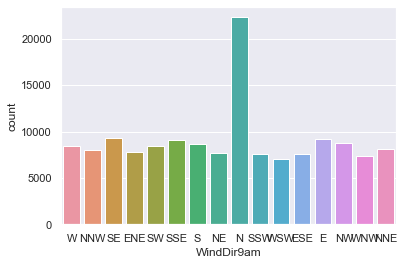

In [17]:
# Visualize the direction of wind at 9 am.
sns.countplot(x="WindDir9am", data=weatherImp)
plt.show()

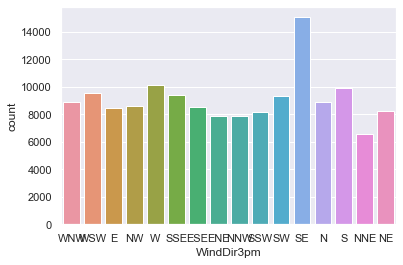

In [18]:
# Visualize the direction of wind at 3 pm.
sns.countplot(x="WindDir3pm", data=weatherImp)
plt.show()

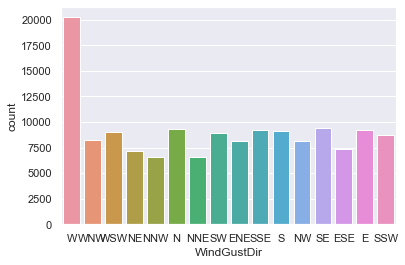

In [19]:
# Visualize the direction of wind gust.
sns.countplot(x="WindGustDir", data=weatherImp)
plt.show()

In [20]:
weatherImp['Year']=weatherImp.Date.dt.year

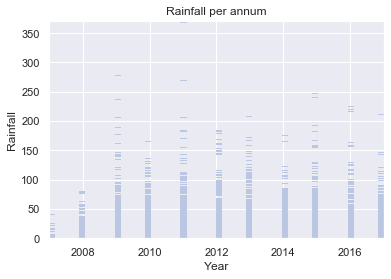

In [21]:
sns.histplot(x="Year", y="Rainfall", data=weatherImp)
plt.title("Rainfall per annum")
plt.show()

In [22]:
weatherImp = weatherImp.drop(["Date", "Year"], axis=1)

### Visualize Correlation

In [23]:
def PlotHeatMap(data, figWidth=8, figHeight=8):
    """
    Generates an heatmap to visualize the correlation between various features in the dataset.
    
        Parameter:
            data (DataFrame): Pandas dataframe to be ploted.
            figWidth (int): Width of the figure.
            figHeight (int): Height of the figure.
            
        Returns:
            None
    """
    plt.figure(figsize=(figWidth,figHeight))
    sns.heatmap(data.corr(numeric_only=True), square=True, 
                annot=True, fmt=".2f")
    plt.show()

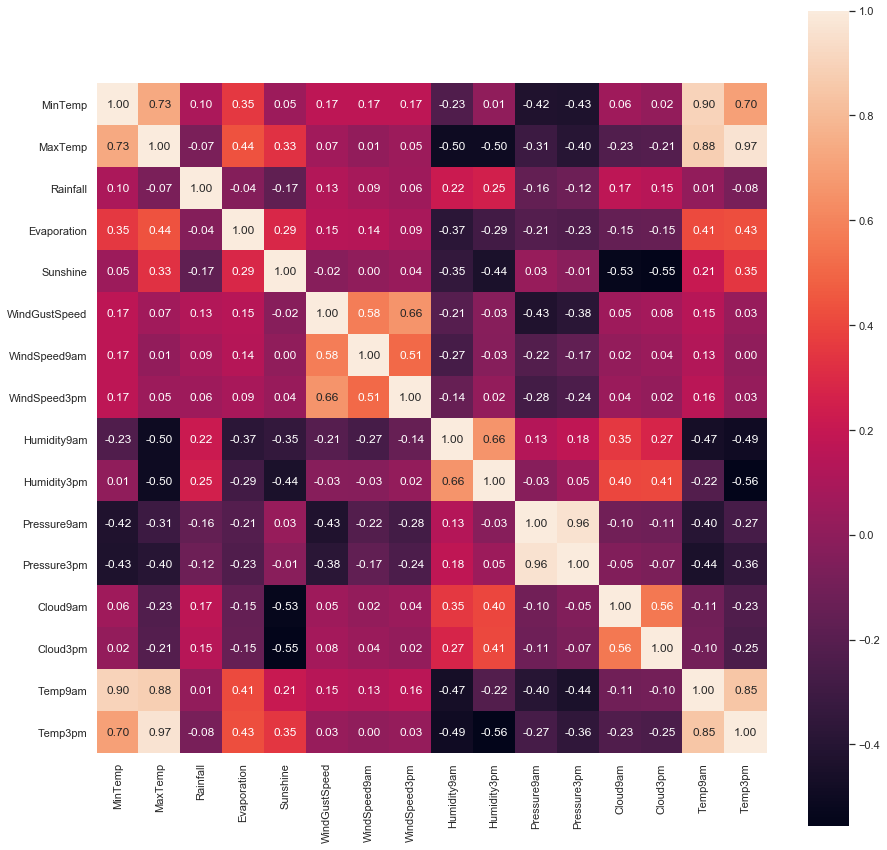

In [24]:
# Plot the correlation matrix as heatmap.
PlotHeatMap(weatherImp, 15, 15)

As we can observe from the above heatmap, there is high correlation between the following features:
* MinTenp & MaxTemp
* MinTemp & Temp9am
* MinTemp & Temp3pm
* MaxTemp & Temp9am
* MaxTemp & Temp3pm
* Temp3pm & Temp9am
* Pressure9am and Pressure3pm
* Evaporation & MaxTemp

In [123]:
def LabelEncoder(data):
    """
    Label encodes all categorical features in the dataframe.
        
        Parameter:
            data (DataFrame): Pandas dataframe on which encoding must be performed.
            
        Returns:
            data (DataFrame): Pandas dataframe containing the encoded data.     
    """
    for col in data.columns:
        if data[col].dtype == "object":
            uniqs = list(data[col].unique())
            data[col] = data[col].apply(lambda x: uniqs.index(x))
    return data

In [28]:
# Label encode all the categorical features.
weatherEnc = LabelEncoder(weatherImp)

In [122]:
def FeatureTargetSplit(data):
    """
    Returns the Features of interest and targets.
        
        Parameter:
            data (DataFrame): Pandas dataframe which is to be splited into features and targets.
        
        Returns:
            features (DataFrame): Pandas dataframe consisting of the features.
            target (DataFrame): Pandas dataframe containing the target.
    """
    featureNames = ["Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am",
                "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainToday"]
    features=data[featureNames]
    target=data["RainTomorrow"]
    return features, target

In [55]:
features, target = FeatureTargetSplit(weatherEnc)

### Train Test Split

The dataset has to be split into training and test set. Here the dataset has 145460 observations and the test ratio is taken as 25% of the total observations. This indicates that the test set should have 25% * 145460 = 36365 observations and training set should have 109095 observations respectively.

In [33]:
def StandardScaler(data):
    """
    Standardize features by removing the mean and scaling to unit variance.
    
        Parameter:
            data (Dataframe): Pandas dataframe whose features must be scaled.
        
        Returns:
            data (Dataframe): Pandas dataframe with scaled features.
    """
    for col in range(data.shape[1]):
        data[:, col] = (data[:, col] - data[:,col].mean()) / (data[:,col].std())
    return data

def TrainTestSplit(features, target, test_ratio=0.2, standardize=False):
    """
    Splits the features & target into respective training and test set based on the test ratio.
    
        Parameter:
            features (DataFrame): Pandas dataframe containing the features.
            target (DataFrame): Pandas dataframe containing the targets.
            test_ratio (double): Percentage of dataset to be hold out for test set. default 20%.
            standardize (bool): if True, features are scaled, default False.
            
        Returns:
            Xtrain (DataFrame): Pandas dataframe containing training features.
            Xtest (DataFrame): Pandas dataframe containing test features.
            ytrain (DataFrame): Pandas dataframe containing training targets.
            ytest (DataFrame): Pandas dataframe containing test targets.
    """
    train_len = len(features)
    train_idxs = list(range(train_len))
    np.random.shuffle(train_idxs)
    split = int(np.floor(test_ratio * train_len))
    Xtest = features.iloc[train_idxs[:split], :].values
    Xtrain = features.iloc[train_idxs[split:], :].values
    ytest = target.iloc[train_idxs[:split]].values
    ytrain = target.iloc[train_idxs[split:]].values
    if standardize:
        # Normalize Features.
        Xtrain = StandardScaler(Xtrain)
        Xtest = StandardScaler(Xtest)
    return Xtrain, Xtest, ytrain, ytest

def plot_rocAUC(fper, tper):
    """
    Generates an ROC AUC curve for the give True Positive Rate and False Positive Rate.
    
            Parameter:
                fper (np.ndarray): Contains the false positive rate.
                tper (np.ndarray): Contains the true positive rate.
            
            Returns:
                None
    """
    plt.plot(fper, tper, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

In [34]:
Xtrain, Xtest, ytrain, ytest = TrainTestSplit(features, target, test_ratio=0.2, standardize=True)

### Training the Random Forest model
Random forest is a commonly-used machine learning algorithm, which combines the output of multiple decision trees to reach a single result. Random Forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. While decision trees consider all the possible feature splits, random forests only select a subset of those features.To create the model we'll be using `RandomForest()` API from mlpack.

In [35]:
# Create and train Random Forest model with 100 trees.
output = mlpack.random_forest(training=Xtrain, labels=ytrain, print_training_accuracy=True,
                             num_trees=100)

In [36]:
rf = output["output_model"]

### Making Predictions on Test set

In [37]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.random_forest(input_model=rf, test=Xtest)

In [38]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

### Model Evaluation

Standardize features by removing the mean and scaling to unit variance### Evaluation metrics

* True Positive - The actual value was true & the model predicted true.
* False Positive - The actual value was false & the model predicted true, Type I error.
* True Negative - The actual value was false & the model predicted false.
* False Negative - The actual value was true & the model predicted false, Type II error.

`Accuracy`: is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

$$Accuracy = \frac{True_{positive} + True_{negative}}{True_{positive} + True_{negative} + False_{positive} + False_{negative}}$$

`Precision`: is calculated as the ratio between the number of positive samples correctly classified to the total number of samples classified as Positive. The precision measures the model's accuracy in classifying a sample as positive.

$$Precision = \frac{True_{positive}}{True_{positive} + False_{positive}}$$

`Recall`: is calulated as the ratio between the number of positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

$$Recall = \frac{True_{positive}}{True_{positive} + False_{negative}}$$

* The decision of whether to use precision or recall depends on the type of problem begin solved.
* If the goal is to detect all positive samples then use recall.
* Use precision if the problem is sensitive to classifying a sample as Positive in general.

* ROC graph has the True Positive rate on the y axis and the False Positive rate on the x axis.
* ROC Area under the curve in the graph is the primary metric to determine if the classifier is doing well, the higher the value the higher the model performance.

In [41]:
def modelEval(ytest, yPreds):
    print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
    print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
    print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
    print(classification_report(ytest,yPreds))
    fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
    plot_rocAUC(fper, tper)

Accuracy: 0.8571153581740685
ROC AUC: 0.7312802789371133
Cohen's Kappa: 0.5261815586674383
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     28370
           1       0.76      0.51      0.61      7995

    accuracy                           0.86     36365
   macro avg       0.82      0.73      0.76     36365
weighted avg       0.85      0.86      0.85     36365



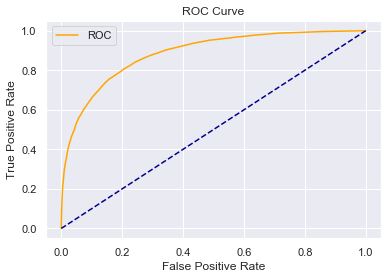

In [42]:
modelEval(ytest, yPreds)

From the above classification report, we can infer that our model trained on imbalanced data performs well on negative class but not the same for positive class.
Also from the ROC AUC Curve, we can infer the same.

### Part 2 - Modelling using Random Oversampling

For this part we would be handling the class imbalance. In order to see how our model performs on the randomly oversampled data. We will be using `Resample()` method to oversample the minority class i.e "Yes, signifying it will rain tomorrow"

In [43]:
def Resample(data, replace, n_samples, random_state = 123):
    np.random.seed(random_state)
    indices = data.index
    random_sampled_indices = np.random.choice(indices,
                                              size=n_samples,
                                              replace=replace)
    return data.loc[random_sampled_indices]

### Oversample the data

In [44]:
# Oversample the minority class.
negClass = weatherData[weatherData.RainTomorrow == "No"]
posClass = weatherData[weatherData.RainTomorrow == "Yes"]
posOverSampled = Resample(posClass, replace=True, n_samples=len(negClass))
overSampled = pd.concat([negClass, posOverSampled])

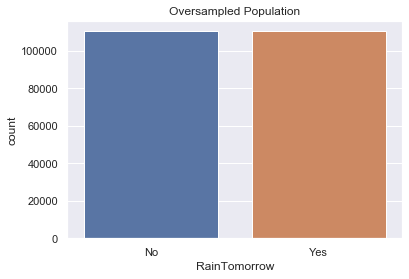

In [45]:
# Visualize the oversampled data distribution.
ax = sns.countplot(x="RainTomorrow", data=overSampled)
ax.set_title("Oversampled Population")
plt.show()

From the above plot we can see that after resampling the minority class (Yes) is oversampled to be equal to the majority class (No). This solves our imbalanced data issue for this part.

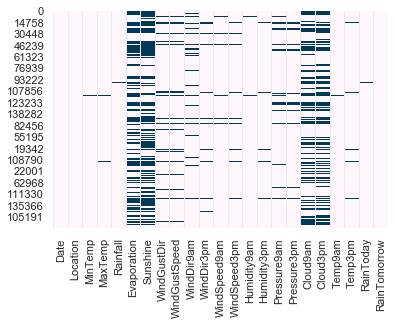

In [46]:
# Plot a heatmap to visualize missing values.
sns.heatmap(overSampled.isnull(), cbar=False, cmap="PuBu")
plt.show()

The above visualization shows that high number of missing values in: Sunshine, Evaporation, Cloud9am and Cloud3pm.

In [47]:
## Check the percentage of missing values in each feature before imputation.
(overSampled.isnull().sum() / len(overSampled)) * 100

Date              0.000000
Location          0.000000
MinTemp           0.490409
MaxTemp           0.213478
Rainfall          1.415932
Evaporation      43.244407
Sunshine         47.513960
WindGustDir       7.021194
WindGustSpeed     6.959099
WindDir9am        6.675369
WindDir3pm        2.918888
WindSpeed9am      0.999855
WindSpeed3pm      1.972969
Humidity9am       1.437235
Humidity3pm       2.733511
Pressure9am       9.848073
Pressure3pm       9.856231
Cloud9am         36.866366
Cloud3pm         38.803981
Temp9am           0.749211
Temp3pm           2.065883
RainToday         1.415932
RainTomorrow      0.000000
dtype: float64

We observe that atmost some features have 50% missing values. So instead of discarding them, we will impute them with  proper imputation method.

In [49]:
# Impute the data using mean imputation strategy.
overSampledImp = Imputer(overSampled)

In [50]:
## Check the percentage of missing values in each feature post imputation.
(overSampledImp.isnull().sum() / len(overSampledImp)) * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [51]:
# Label encode all the categorical features.
overSampledEnc = LabelEncoder(overSampledImp)

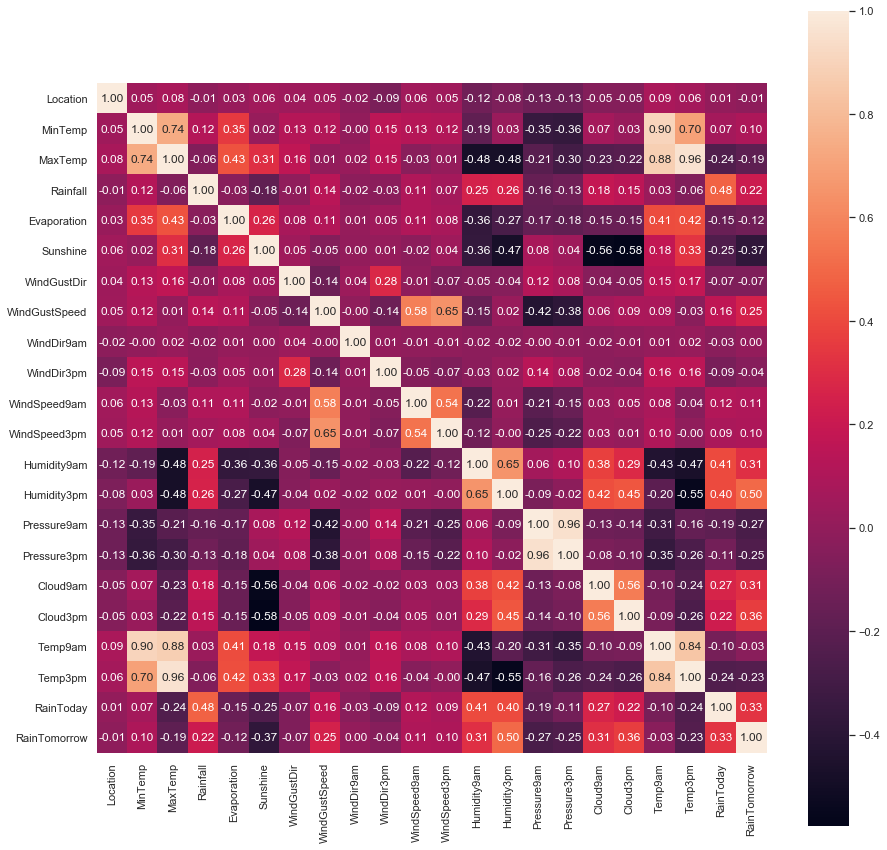

In [52]:
# Plot the correlation matrix as heatmap.
PlotHeatMap(overSampledEnc, 15, 15)

As we can observe from the above heatmap, there is high correlation between the following features:
* MinTenp & MaxTemp.
* MinTemp & Temp9am.
* MinTemp & Temp3pm.
* MaxTemp & Temp9am.
* MaxTemp & Temp3pm.
* Temp3pm & Temp9am.
* Pressure9am and Pressure3pm.
* Evaporation & MaxTemp.

In [92]:
features, target = FeatureTargetSplit(overSampledEnc)

### Train Test Split
The dataset has to be split into training and test set. Here the dataset has 220632 observations and the test ratio is taken as 25% of the total observations. This indicates that the test set should have 25% * 220632 = 55158 observations and training set should have 165474 observations respectively.

In [60]:
Xtrain, Xtest, ytrain, ytest = TrainTestSplit(features, target, test_ratio=0.2, standardize=True)

### Training the Random Forest model
We will use `RandomForest()` API from mlpack to train the model with 100 trees on the oversampled data.

In [61]:
# Create and train Random Forest model with 100 trees.
output = mlpack.random_forest(training=Xtrain, labels=ytrain, print_training_accuracy=True,
                             num_trees=100)

In [62]:
rf = output["output_model"]

### Making Predictions on Test set

In [63]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.random_forest(input_model=rf, test=Xtest)

In [64]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

### Model Evaluation

Accuracy: 0.9410964864570869
ROC AUC: 0.9411511434722494
Cohen's Kappa: 0.8822054656809394
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     27632
           1       0.92      0.97      0.94     27526

    accuracy                           0.94     55158
   macro avg       0.94      0.94      0.94     55158
weighted avg       0.94      0.94      0.94     55158



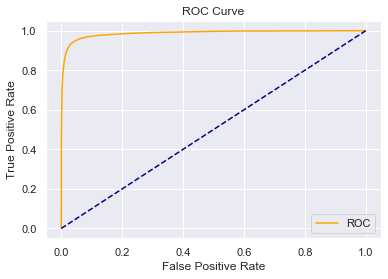

In [66]:
modelEval(ytest, yPreds)

From the above classification report, we can infer that our model trained on oversampled data performs well on both the classes, This proves the fact that imbalanced data has affected the model trained in part one. Also from the ROC AUC Curve, we can infer the True Positive Rate is around 94%, which is a good significance that our model performs well on unseen data.

### Part-3 Modelling using Synthetic Minority Over Sampling Technique

For this part we would be handling the class imbalance. In order to see how our model performs on the oversampled data using SMOTE. We will be using `SMOTE` API from imblearn to oversample the minority class i.e "Yes, signifying it will rain tomorrow".

In [68]:
smoteData = weatherData.copy()

Unlike our `Resample` method, we need to handle missing and categorical data before applying `SMOTE`.

In [69]:
## Check the percentage of missing values in each feature before imputation.
(smoteData.isnull().sum() / len(smoteData)) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

We observe that atmost some features have 50% missing values. So instead of discarding them, we will impute them with  proper imputation method.

In [73]:
# Impute the data using mean imputation strategy.
smoteImp = Imputer(smoteData)

In [74]:
## Check the percentage of missing values in each feature post imputation.
(smoteImp.isnull().sum() / len(smoteImp)) * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [75]:
# Label encode all the categorical features.
smoteEnc = LabelEncoder(smoteImp)

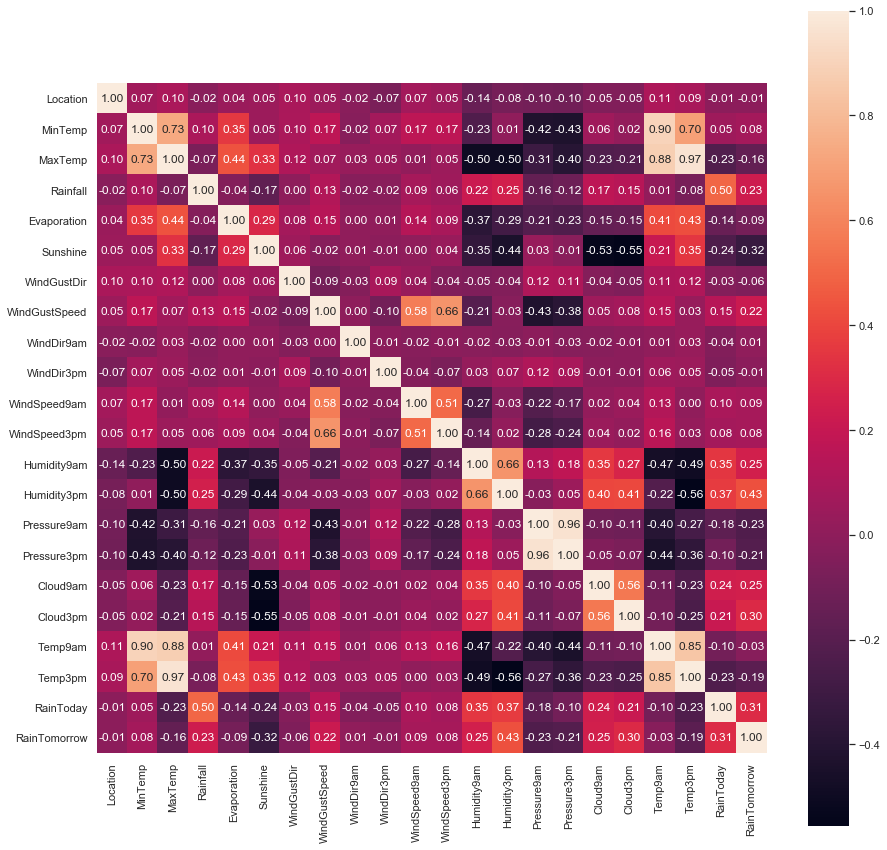

In [76]:
# Plot the correlation matrix as heatmap.
PlotHeatMap(smoteEnc, 15, 15)

As we can observe from the above heatmap, there is high correlation between the following features:
* MinTenp & MaxTemp.
* MinTemp & Temp9am.
* MinTemp & Temp3pm.
* MaxTemp & Temp9am.
* MaxTemp & Temp3pm.
* Temp3pm & Temp9am.
* Pressure9am and Pressure3pm.
* Evaporation & MaxTemp.

In [77]:
featureNames = ["Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am",
                "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainToday", "RainTomorrow"]

features = smoteEnc[featureNames]

In [78]:
from imblearn.over_sampling import SMOTE

In [94]:
os = SMOTE()
features, targets = os.fit_resample(features.iloc[:, :-1], features.iloc[:,-1])

In [96]:
features.shape

(306550, 20)

### Train Test Split
The dataset has to be split into training and test set. The test ratio is taken as 25% of the total observations.

In [80]:
Xtrain, Xtest, ytrain, ytest = TrainTestSplit(features, target, test_ratio=0.2, standardize=True)

### Training the Random Forest model
We will use `RandomForest()` API from mlpack to train the model with 100 trees on the SMOTE data.

In [81]:
# Create and train Random Forest model with 100 trees.
output = mlpack.random_forest(training=Xtrain, labels=ytrain, print_training_accuracy=True,
                             num_trees=100)

In [82]:
rf = output["output_model"]

### Making Predictions on Test set

In [83]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.random_forest(input_model=rf, test=Xtest)

In [84]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

### Model Evalutation

Accuracy: 0.8303252275888785
ROC AUC: 0.8310346203298347
Cohen's Kappa: 0.6611239899873813
              precision    recall  f1-score   support

           0       0.94      0.71      0.81     28557
           1       0.76      0.96      0.85     28234

    accuracy                           0.83     56791
   macro avg       0.85      0.83      0.83     56791
weighted avg       0.85      0.83      0.83     56791



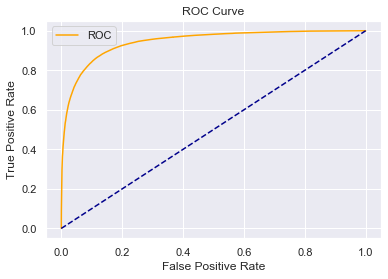

In [85]:
modelEval(ytest, yPreds)

From the above classification report, we can infer that our model trained on SMOTE data performs well on both the classes, There is some difference from the randomly oversampled data due to variation in the samples generated by SMOTE. Also from the ROC AUC Curve, we can infer the True Positive Rate is around 80%, which is a quantifies that our model performs well on unseen data.

### Part-4 Modelling using Random Undersampling

For this part we would be handling the class imbalance by undersampling the majority class, to see how well our model trains and performs on randomly undersampled data.

### Undersample the data

In [97]:
# Undersample the majority class.
negClass = weatherData[weatherData.RainTomorrow == "No"]
posClass = weatherData[weatherData.RainTomorrow == "Yes"]
negUnderSampled = Resample(negClass, replace=False, n_samples=len(posClass))
underSampled = pd.concat([negUnderSampled, posClass])

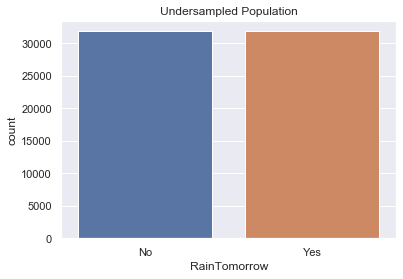

In [115]:
# Visualize the distibution of target classes.
ax = sns.countplot(x="RainTomorrow", data=underSampled)
ax.set_title("Undersampled Population")
plt.show()

From the above plot we can see that after resampling the majority class (No) is undersampled to be equal to the majority class (Yes). This solves our imbalanced data issue for this part.

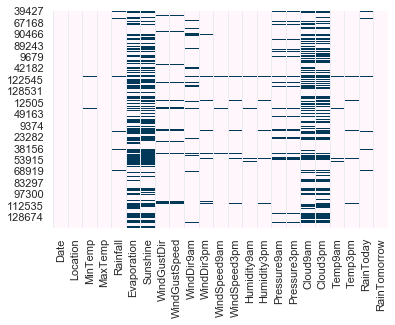

In [99]:
# Plot a heatmap to visualize missing values.
sns.heatmap(underSampled.isnull(), cbar=False, cmap="PuBu")
plt.show()

The above visualization shows that high number of missing values in: Sunshine, Evaporation, Cloud9am and Cloud3pm.

In [100]:
## Check the percentage of missing values in each feature before imputation.
(underSampled.isnull().sum() / len(underSampled)) * 100

Date              0.000000
Location          0.000000
MinTemp           0.481538
MaxTemp           0.208614
Rainfall          1.411676
Evaporation      43.275716
Sunshine         47.521724
WindGustDir       7.048969
WindGustSpeed     6.994071
WindDir9am        6.584685
WindDir3pm        2.909621
WindSpeed9am      1.028955
WindSpeed3pm      1.995169
Humidity9am       1.341092
Humidity3pm       2.653951
Pressure9am       9.795464
Pressure3pm       9.809581
Cloud9am         36.901214
Cloud3pm         38.843053
Temp9am           0.723092
Temp3pm           2.042225
RainToday         1.411676
RainTomorrow      0.000000
dtype: float64

We observe that atmost some features have 50% missing values. So instead of discarding them, we will impute them with  proper imputation method.

In [101]:
# Impute the data using mean imputation strategy.
underSampledImp = Imputer(underSampled)

In [102]:
## Check the percentage of missing values in each feature post imputation.
(underSampledImp.isnull().sum() / len(underSampledImp)) * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [103]:
# Label encode all the categorical features.
underSampledEnc = LabelEncoder(underSampledImp)

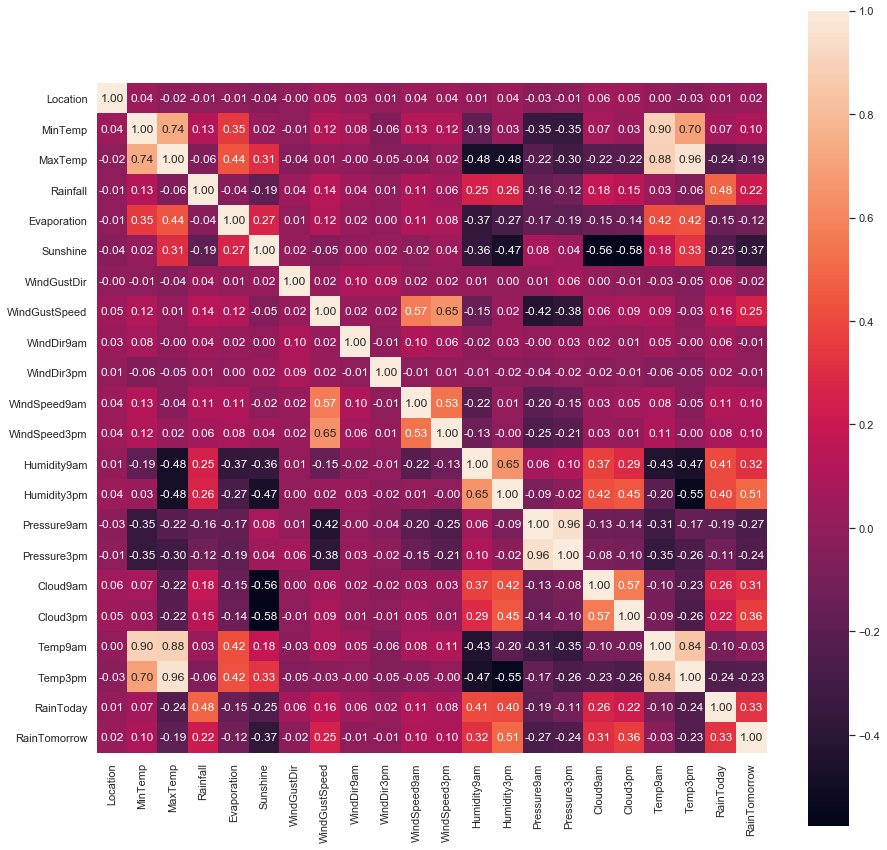

In [114]:
# Plot the correlation matrix as heatmap.
PlotHeatMap(underSampledEnc, 15, 15)

As we can observe from the above heatmap, there is high correlation between the following features:
* MinTenp & MaxTemp.
* MinTemp & Temp9am.
* MinTemp & Temp3pm.
* MaxTemp & Temp9am.
* MaxTemp & Temp3pm.
* Temp3pm & Temp9am.
* Pressure9am and Pressure3pm.
* Evaporation & MaxTemp.

In [119]:
features, target = FeatureTargetSplit(underSampledEnc)

### Train Test Split
The dataset has to be split into training and test set. Here the dataset has 63754 observations and the test ratio is taken as 25% of the total observations. This indicates that the test set should have 25% * 63754 = 15938 observations and training set should have 47816 observations respectively.

In [120]:
Xtrain, Xtest, ytrain, ytest = TrainTestSplit(features, target, test_ratio=0.2, standardize=True)

### Training the Random Forest model
We will use `RandomForest()` API from mlpack to train the model with 100 trees on the random undersampled data.

In [108]:
# Create and train Random Forest model with 100 trees.
output = mlpack.random_forest(training=Xtrain, labels=ytrain, print_training_accuracy=True,
                             num_trees=100)

In [109]:
rf = output["output_model"]

### Making Predictions on Test set

In [110]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.random_forest(input_model=rf, test=Xtest)

In [111]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

### Model Evalutation

Accuracy: 0.7923202409336177
ROC AUC: 0.7923411032322564
Cohen's Kappa: 0.5846536476450601
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      7936
           1       0.80      0.79      0.79      8002

    accuracy                           0.79     15938
   macro avg       0.79      0.79      0.79     15938
weighted avg       0.79      0.79      0.79     15938



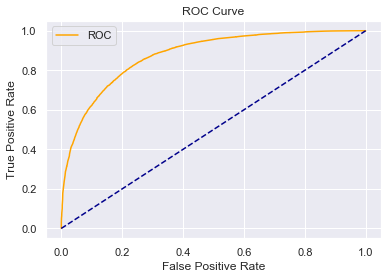

In [112]:
modelEval(ytest, yPreds)

From the above classification report, we can infer that our model trained on undersampled data performs well on both the classes compared to imbalanced model in Part 1. Also from the ROC AUC Curve, we can infer the True Positive Rate is around 80%, which is better than imbalanced model, but still performs worse than oversampled model.

### Conclusion

Both random oversampled & SMOTE model performs well on test data, random undersampled model performs better compared to imbalanced model, but there is still room for improvement. Feel free to play around with the hyperparameters, training data split ratio etc. 